## Objective 1: train a model that will classify the abalone "Sex" as male, female, or infant.
## Objective 2: create a function to predict any variable in the set

The data has the following characteristics, it is supervised and offline

- supervised: the training data being fed to the algorithm includes the desired solutions
- offline: the model is trained using all the available data, it is not trained incrementally using a stream of data

Whole Weight.1 is "shucked weight" and Whole Weight.1 is "viscera weight"

In [43]:
import pandas as pd

abalone_data = "abalone_data.csv"

abalone_df = pd.read_csv(abalone_data)

# Exploratory Data Analysis

In [2]:
abalone_df

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Whole weight.1  4177 non-null   float64
 6   Whole weight.2  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
from sklearn.model_selection import train_test_split

# to create a new series composed of our targets
aba_labels = abalone_df['Sex']
# to drop our target column and resave without the target column
aba_features = abalone_df.drop('Sex', axis = 1)


# create a training and a test set
X_train, X_test, y_train, y_test = train_test_split(aba_features, aba_labels,  test_size=0.2, random_state=42)

attributes = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'
]

In [5]:
X_train.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,0.524964,0.408518,0.139790,0.830838,0.360561,0.180832,0.239682,9.944627
std,0.119137,0.098687,0.042514,0.491583,0.223018,0.109444,0.139941,3.207344
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.443000,0.186500,0.093000,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.802000,0.337000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.151000,0.503500,0.253500,0.328500,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [41]:
aba_labels.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

### Visuals

In [6]:
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np




# jitter so all points dont land right on top of one another
jittered_df = X_train[['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings']] + np.random.uniform(-0.1, 0.1, size=(len(X_train), 8))


# Create the scatter matrix for numeric data types
sns.pairplot(jittered_df, diag_kind='kde', kind='scatter', plot_kws={'alpha':0.35, 's': 10})
plt.suptitle("Scatter Matrix of Numeric Features w/ Jitter", fontsize=16)
plt.tight_layout()
plt.show()

In [8]:
corr_df = abalone_df[['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings']]

# Define a mapping dictionary
mapping = {"M": 0, "F": 1, "I": 2}

# # Apply the mapping to the 'sex' column
int_values = [mapping[value] for value in corr_df['Sex']]




In [9]:
# create a results_df just to include the sex (as numeric) in the correlation matrix

# Concatenate aba_features with int_values 
result_df = pd.concat([aba_features, pd.Series(int_values, name='Sex_encoded', index=aba_features.index)], axis=1)

result_df


,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex_encoded
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,2
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1


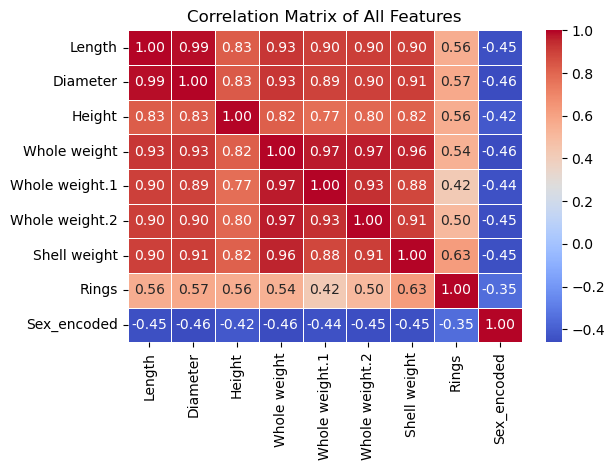

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = result_df.corr()

# Generate a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Matrix of All Features')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Interesting that all the variables have roughly the same level of correlation with our Sex_encoded feature. Possibly the rings feature could be removed for efficiency but given the similar relationships across the board we will use all features.

### Histograms

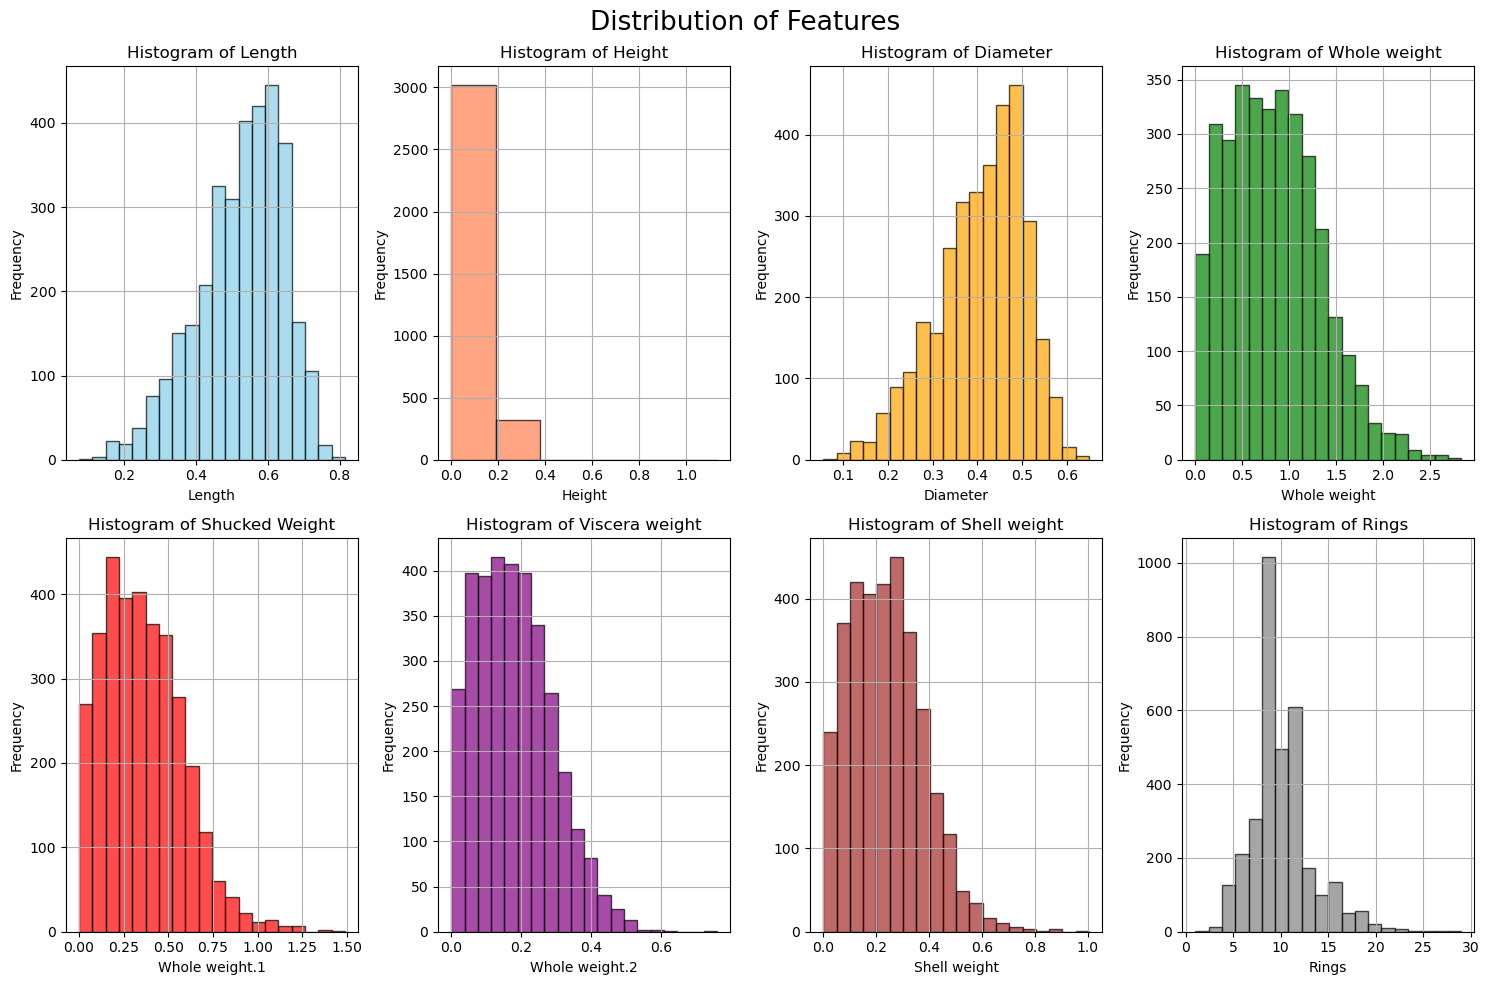

In [42]:
import matplotlib.pyplot as plt

# Create histogram plots 
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# Flatten axes for easier iteration
axes = axes.flatten()

# Histogram for Length
X_train["Length"].hist(ax=axes[0], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Histogram of Length')
axes[0].set_xlabel('Length')
axes[0].set_ylabel('Frequency')

# Histogram for Height
X_train["Height"].hist(ax=axes[1], bins=6, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('Histogram of Height')
axes[1].set_xlabel('Height')
axes[1].set_ylabel('Frequency')

# Histogram for Diameter
X_train["Diameter"].hist(ax=axes[2], bins=20, color='orange', edgecolor='black', alpha=0.7)
axes[2].set_title('Histogram of Diameter')
axes[2].set_xlabel('Diameter')
axes[2].set_ylabel('Frequency')

# Histogram for Whole weight
X_train["Whole weight"].hist(ax=axes[3], bins=20, color='green', edgecolor='black', alpha=0.7)
axes[3].set_title('Histogram of Whole weight')
axes[3].set_xlabel('Whole weight')
axes[3].set_ylabel('Frequency')

# Histogram for Whole weight.1
X_train["Whole weight.1"].hist(ax=axes[4], bins=20, color='red', edgecolor='black', alpha=0.7)
axes[4].set_title('Histogram of Shucked Weight')
axes[4].set_xlabel('Whole weight.1')
axes[4].set_ylabel('Frequency')

# Histogram for Whole weight.2
X_train["Whole weight.2"].hist(ax=axes[5], bins=20, color='purple', edgecolor='black', alpha=0.7)
axes[5].set_title('Histogram of Viscera weight')
axes[5].set_xlabel('Whole weight.2')
axes[5].set_ylabel('Frequency')

# Histogram for Shell weight
X_train["Shell weight"].hist(ax=axes[6], bins=20, color='brown', edgecolor='black', alpha=0.7)
axes[6].set_title('Histogram of Shell weight')
axes[6].set_xlabel('Shell weight')
axes[6].set_ylabel('Frequency')

# Histogram for Rings
X_train["Rings"].hist(ax=axes[7], bins=20, color='gray', edgecolor='black', alpha=0.7)
axes[7].set_title('Histogram of Rings')
axes[7].set_xlabel('Rings')
axes[7].set_ylabel('Frequency')

plt.suptitle("Distribution of Features", fontsize=19)
plt.tight_layout()
plt.show()


We will apply a scalar to all continuous numeric features, height and rings look like examples of features that it would be important to scale.

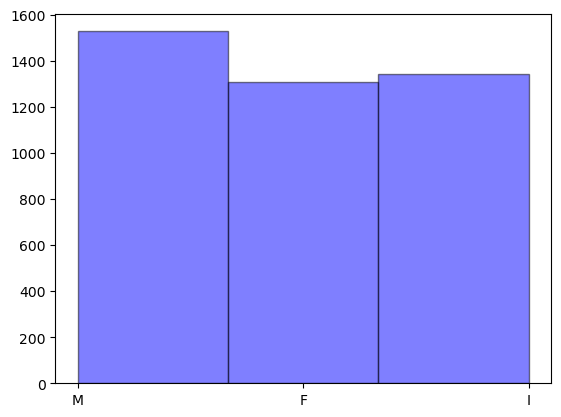

In [12]:
# dist data for Sex
abalone_df["Sex"].hist(bins=3, color='blue', edgecolor='black', alpha=0.5, grid=False)
plt.show()

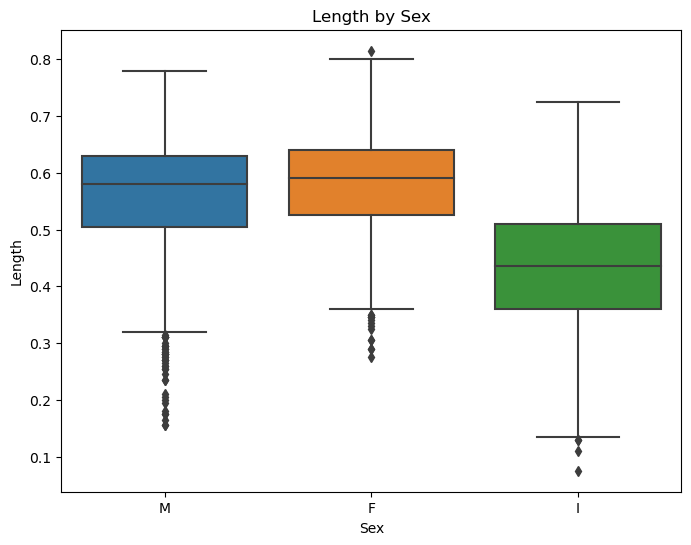

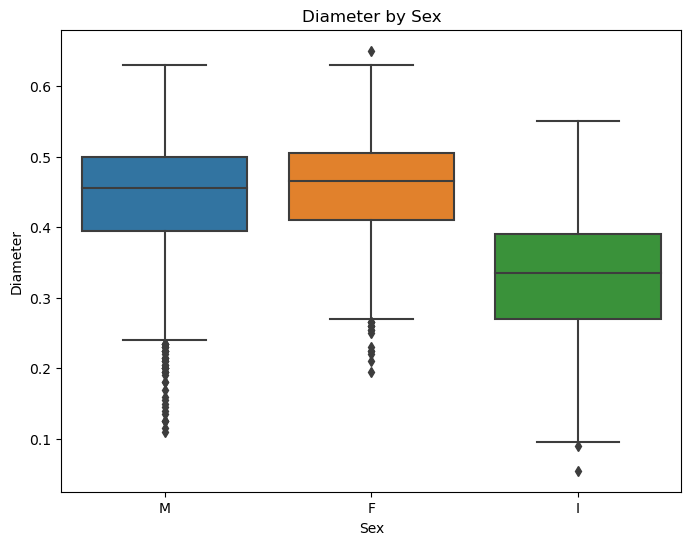

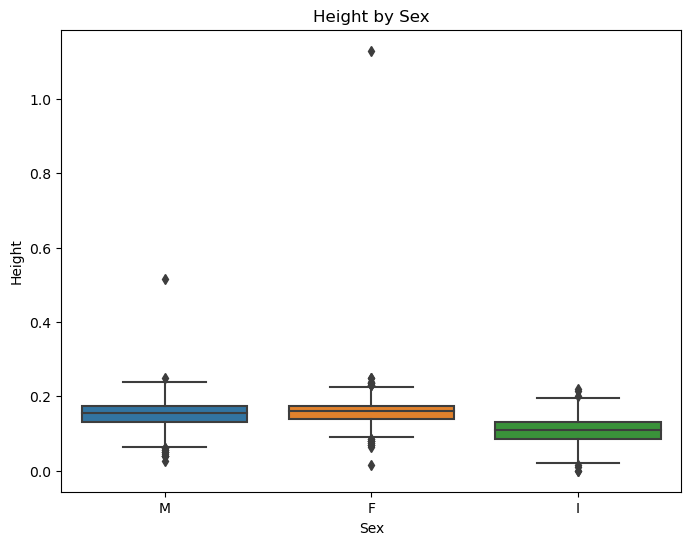

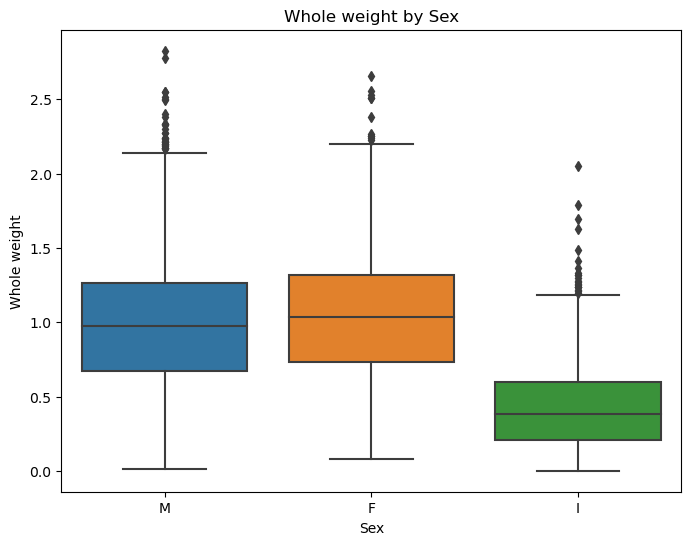

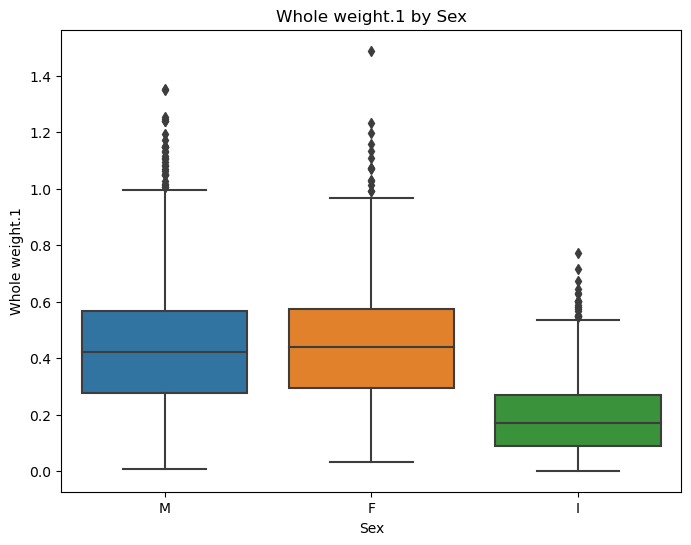

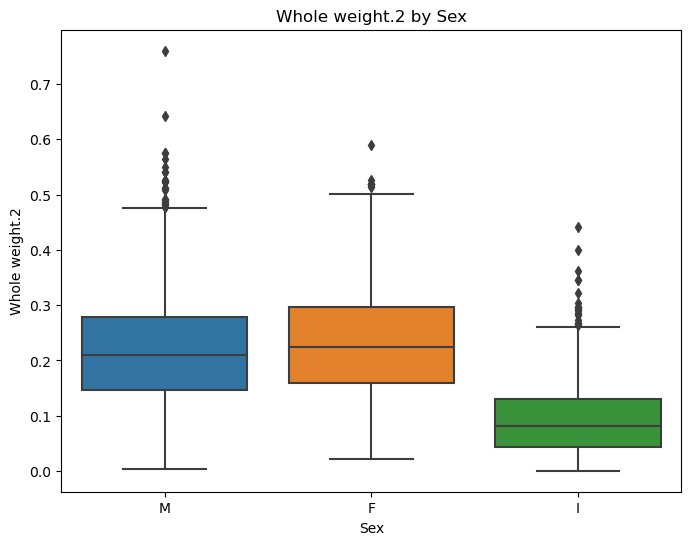

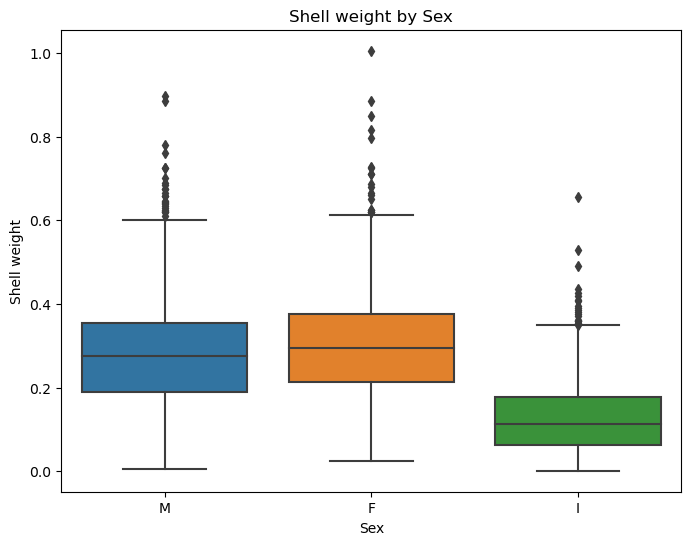

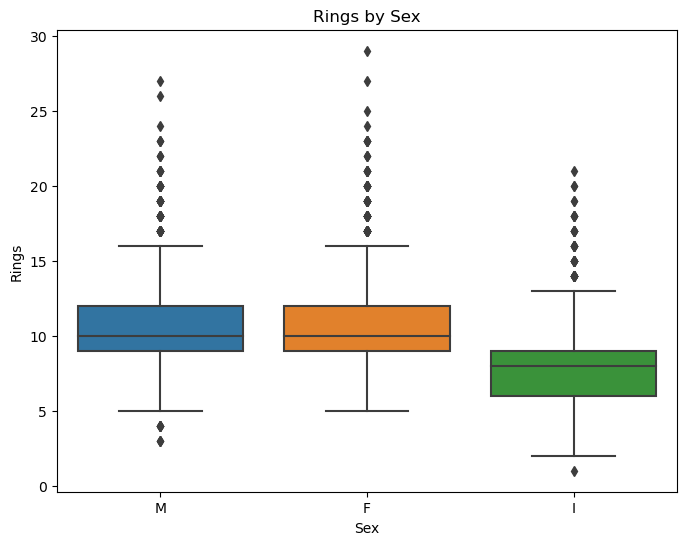

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical and categorical features (excluding "Sex")
numerical_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings']
categorical_features = [feature for feature in abalone_df.columns if feature != 'Sex' and feature not in numerical_features]

# Plot numerical features using box plots
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Sex', y=feature, data=abalone_df)
    plt.title(f'{feature} by Sex')
    plt.xlabel('Sex')
    plt.ylabel(feature)
    plt.show()

# Plot categorical features using count plots
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Sex', data=abalone_df)
    plt.title(f'{feature} Count by Sex')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


Boxplots seem to show that there is not really a large difference between male and female abalones along the features we are observing. Infants do seem to be outliers in many features. We might remove the height outliers; 1 in M and 1 in F

# Data Preprocessing

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_indices = X_train[attributes].select_dtypes(include=['int64', 'float64']).columns

num_pipeline = Pipeline([
    ('scaler', StandardScaler())  # scales continuous data
])

preprocessing = ColumnTransformer([
    ("numeric", num_pipeline, num_indices),
])


X_train_prepared = preprocessing.fit_transform(X_train)
X_test_prepared = preprocessing.transform(X_test)

# Objective 1: Predict Sex


## Modeling

### logistic_model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Create a logistic regression model
# Logistic for classification instead of linear for regression
logistic_model = LogisticRegression()

# Perform cross-validation on the training data
cv_scores_log = cross_val_score(logistic_model, X_train_prepared, y_train, cv=5)

# Train the model on the entire training data
logistic_model.fit(X_train_prepared, y_train)

# Predictions on training and test data
y_pred_train_log = logistic_model.predict(X_train_prepared)
y_pred_test_log = logistic_model.predict(X_test_prepared)

# Evaluate the model
accuracy_train_log = logistic_model.score(X_train_prepared, y_train)
accuracy_test_log = logistic_model.score(X_test_prepared, y_test)

print("Cross-Validation Scores:", cv_scores_log)
print("Average Cross-Validation Score:", cv_scores_log.mean())
print("Training Accuracy:", accuracy_train_log)
print("Testing Accuracy:", accuracy_test_log)

# Generate classification report for test data
classification_report_log = classification_report(y_test, y_pred_test_log)
print("Classification Report for Test Data:")
print(classification_report_log)


Cross-Validation Scores: [0.53512706 0.55688623 0.56137725 0.53592814 0.57335329]
Average Cross-Validation Score: 0.5525343930972136
Training Accuracy: 0.5558216102963185
Testing Accuracy: 0.583732057416268
Classification Report for Test Data:
              precision    recall  f1-score   support

           F       0.50      0.38      0.43       262
           I       0.69      0.87      0.76       267
           M       0.52      0.51      0.52       307

    accuracy                           0.58       836
   macro avg       0.57      0.59      0.57       836
weighted avg       0.57      0.58      0.57       836



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


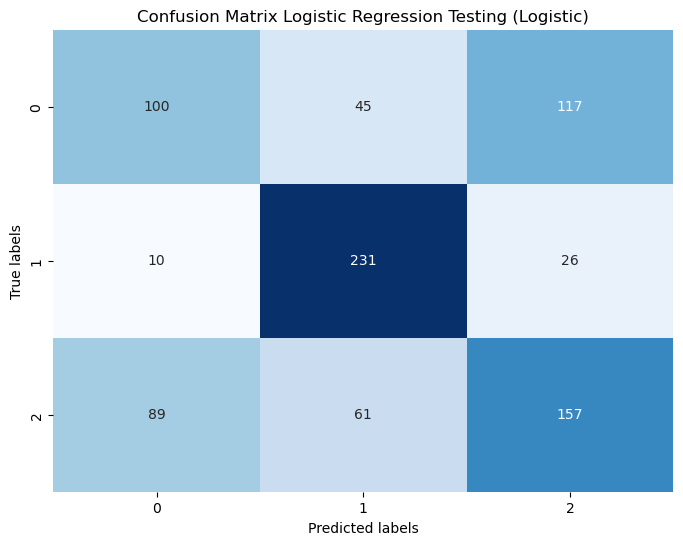

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_test_log)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Logistic Regression Testing (Logistic)')
plt.show()


### random_forest_model

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train_prepared, y_train)

# Once trained, you can use the model to make predictions
# For example, to predict the labels of X_train
y_pred_train_rf = random_forest_model.predict(X_train_prepared)
y_pred_test_rf = random_forest_model.predict(X_test_prepared)

# Perform cross-validation on the training data
cv_scores_rf = cross_val_score(random_forest_model, X_train_prepared, y_train, cv=5)

# Evaluate the model (optional)
# You can use various metrics such as accuracy, precision, recall, F1-score, etc.
# For example, to compute accuracy on the training data
accuracy_train_rf = random_forest_model.score(X_train_prepared, y_train)
accuracy_test_rf = random_forest_model.score(X_test_prepared, y_test)


print("RF Cross-Validation Scores:", cv_scores_rf)
print("Average Cross-Validation Score:", cv_scores_rf.mean())
print("Training Accuracy:", accuracy_train_rf)
print("Testing Accuracy:", accuracy_test_rf)

# Generate classification report for test data
classification_report_rf = classification_report(y_test, y_pred_test_rf)
print("Classification Report for Test Data (Random Forest):")
print(classification_report_rf)

RF Cross-Validation Scores: [0.52017937 0.55239521 0.5508982  0.54341317 0.56287425]
Average Cross-Validation Score: 0.5459520421041326
Training Accuracy: 1.0
Testing Accuracy: 0.5598086124401914
Classification Report for Test Data (Random Forest):
              precision    recall  f1-score   support

           F       0.46      0.40      0.43       262
           I       0.73      0.78      0.75       267
           M       0.48      0.50      0.49       307

    accuracy                           0.56       836
   macro avg       0.56      0.56      0.56       836
weighted avg       0.55      0.56      0.56       836



A little skeptical that the training data is labeled perfectly, the testing data looks more realistic.

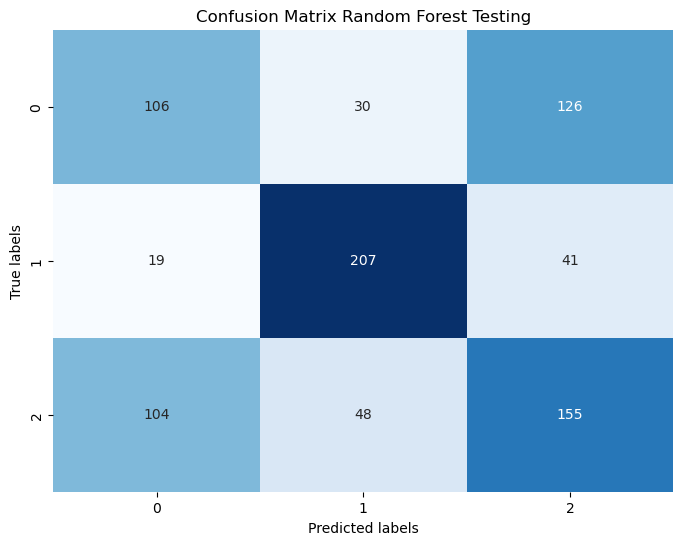

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_test_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Random Forest Testing')
plt.show()


### K-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Create a KNeighborsClassifier model
knn_model = KNeighborsClassifier()

# Perform cross-validation on the training data
cv_scores_knn = cross_val_score(knn_model, X_train_prepared, y_train, cv=5)

# Train the model on the entire training data
knn_model.fit(X_train_prepared, y_train)

# Predictions on training and test data
y_pred_train_knn = knn_model.predict(X_train_prepared)
y_pred_test_knn = knn_model.predict(X_test_prepared)

# Evaluate the model
accuracy_train_knn = knn_model.score(X_train_prepared, y_train)
accuracy_test_knn = knn_model.score(X_test_prepared, y_test)

print("KNN Cross-Validation Scores:", cv_scores_knn)
print("Average Cross-Validation Score:", cv_scores_knn.mean())
print("Training Accuracy:", accuracy_train_knn)
print("Testing Accuracy:", accuracy_test_knn)

# Generate classification report for test data
classification_report_test_knn = classification_report(y_test, y_pred_test_knn)
print("Classification Report for Test Data:")
print(classification_report_test_knn)


KNN Cross-Validation Scores: [0.51718984 0.50748503 0.53892216 0.52844311 0.53143713]
Average Cross-Validation Score: 0.5246954521450373
Training Accuracy: 0.6761448668063454
Testing Accuracy: 0.5382775119617225
Classification Report for Test Data:
              precision    recall  f1-score   support

           F       0.43      0.46      0.44       262
           I       0.69      0.77      0.73       267
           M       0.49      0.41      0.44       307

    accuracy                           0.54       836
   macro avg       0.53      0.54      0.54       836
weighted avg       0.53      0.54      0.53       836



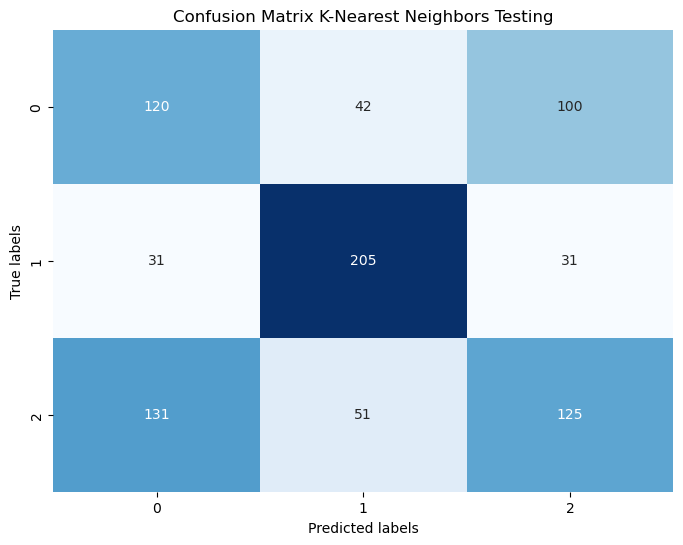

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix K-Nearest Neighbors Testing')
plt.show()

## Objective 2: Build a function to predict any variable in the set

In our function we will again use logistic regression for "Sex" and linear regression for the remaining columns

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

def preprocess_train(df, target, task):
    df = df.copy()
    
    # if the sex column is not the target, then one hot encode it 
    if target != 'Sex':
        dummies = pd.get_dummies(df['Sex'])
        df = pd.concat([df, dummies], axis=1)
        df = df.drop('Sex', axis=1)
    
    # to create a new series composed of our targets
    aba_labels = df[target].copy()
    # to drop our target column and resave without the target column
    aba_features = df.drop(target, axis=1)

    # create a training and a test set
    X_train, X_test, y_train, y_test = train_test_split(aba_features, aba_labels,  test_size=0.2, random_state=42)

    # scale the data, give each column a similar round of values
    scaler = StandardScaler()
    scaler.fit(X_train)  
    
    # transform the features using the scaler
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Convert scaled arrays back to DataFrame
    X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    # Create the model
    if task == 'regression':
        model = LinearRegression()
    elif task == 'classification':
        model = LogisticRegression()
    
    # fit the model
    model.fit(X_train, y_train)
    
    # Return test results
    return model.score(X_test, y_test)


In [22]:
# # to confirm scalar effect
# print("means", X_train.mean())
# print("variance", X_train.var())

### Predict Sex

In [23]:
results = preprocess_train(abalone_df, target = 'Sex', task = 'classification')

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
print("Sex Classification Test Results: {:.2f}%".format(results * 100))

Sex Classification Test Results: 58.37%


### Predict Length

In [25]:
results = preprocess_train(abalone_df, target = 'Length', task = 'regression')

In [26]:
print("Length Regression Test Results: {:.2f}%".format(results * 100))

Length Regression Test Results: 97.16%


### Predict Diameter

In [27]:
results = preprocess_train(abalone_df, target = 'Diameter', task = 'regression')

In [28]:
print("Diameter Regression Test Results: {:.2f}%".format(results * 100))

Diameter Regression Test Results: 97.32%


### Predict Height

In [29]:
results = preprocess_train(abalone_df, target = 'Height', task = 'regression')

In [30]:
print("Height Regression Test Results: {:.2f}%".format(results * 100))

Height Regression Test Results: 84.15%


### Predict Whole weight

In [31]:
results = preprocess_train(abalone_df, target = 'Whole weight', task = 'regression')

In [32]:
print("Whole weight Regression Test Results: {:.2f}%".format(results * 100))

Whole weight Regression Test Results: 98.68%


### Predict Shucked Weight

In [45]:
results = preprocess_train(abalone_df, target = 'Whole weight.1', task = 'regression')

In [46]:
print("Shucked Weight Regression Test Results: {:.2f}%".format(results * 100))

Shucked Weight Regression Test Results: 95.45%


### Predict Viscera Weight 

In [47]:
results = preprocess_train(abalone_df, target = 'Whole weight.2', task = 'regression')

In [48]:
print("Viscera Weight Regression Test Results: {:.2f}%".format(results * 100))

Viscera Weight Regression Test Results: 93.63%


### Predict Shell Weight

In [49]:
results = preprocess_train(abalone_df, target = 'Shell weight', task = 'regression')

In [50]:
print("Shell weight Regression Test Results: {:.2f}%".format(results * 100))

Shell weight Regression Test Results: 93.50%


### Predict Rings

In [51]:
results = preprocess_train(abalone_df, target = 'Rings', task = 'regression')

In [40]:
print("Rings Regression Test Results: {:.2f}%".format(results * 100))

Rings Regression Test Results: 54.82%


rings can be either categorical or continuous depending on your definition

In [59]:
results = preprocess_train(abalone_df, target = 'Rings', task = 'classification')

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
print("Rings Classification Test Results: {:.2f}%".format(results * 100))

Rings Classification Test Results: 27.99%
